# **Introduction To Image Generation**

# What is Image Generation?

Image generation refers to the process of creating images, often artificially, using algorithms and models. These images can be generated from scratch or modified from existing images. Image generation has various applications in computer vision, art, design, and other fields. There are several approaches to image generation, including:

1. **Generative Adversarial Networks (GANs)**: GANs consist of a generator and a discriminator network that compete against each other. The generator creates images, and the discriminator tries to distinguish between real and generated images. Over time, GANs can produce highly realistic images.

2. **Variational Autoencoders (VAEs)**: VAEs are a type of neural network that learns to encode and decode images. They are commonly used for generating new images by sampling from the learned latent space.

3. **Deep Convolutional Networks**: These deep neural networks employ convolutional layers to capture spatial features and generate images. They are often used in tasks like style transfer, image-to-image translation, and super-resolution.

4. **Recurrent Neural Networks (RNNs)**: RNNs can be used to generate images sequentially, pixel by pixel. They are less common but have been used for tasks like handwritten text generation.

5. **PixelRNN and PixelCNN**: These models generate images one pixel at a time, conditioning each pixel on the previously generated ones.

6. **Autoencoders**: Autoencoders can be used for image generation by training them to recreate input images. By manipulating the learned latent representations, new images can be generated.

Image generation has a wide range of applications, including art generation, data augmentation, style transfer, image completion, and more. It plays a crucial role in various domains, from entertainment and design to medical imaging and computer vision.

# What is Diffusion Model?

A diffusion model, in the context of generative models and image synthesis, refers to a class of generative models that simulate the generation of data, often images, through a diffusion process. These models are designed to generate high-quality images by modeling the way data, such as pixels in an image, evolves or diffuses over time.

The key idea behind diffusion models is to break down the generation process into a sequence of steps, where each step adds or modifies information in the data. In the context of image generation, this involves iteratively improving an image from an initial random or noise distribution to a high-quality final image.

The typical diffusion process in these models involves the following steps:

1. **Initialization**: Start with a random noise image.

2. **Diffusion Steps**: Over a series of steps, perturb the image in a controlled manner. This perturbation can be noise or other small changes, and it is typically annealed or controlled to ensure the diffusion is smooth and controlled.

3. **Final Image**: After a specified number of steps, the image reaches its final state, which should resemble a high-quality image.

One of the main advantages of diffusion models is their ability to generate high-quality, realistic images. These models often outperform traditional generative models and are used in applications such as image generation, image denoising, and image inpainting.

One of the notable diffusion models is the "Diffusion Probabilistic Models" (DPM) framework, which introduced the concept of diffusion models for image synthesis. These models have shown remarkable results in image synthesis tasks and are actively researched in the field of generative modeling.

## Diffusion Model Used:

Diffusion models typically use deep neural networks as their architectural backbone. These networks are responsible for modeling the diffusion process and generating data, such as images, text, or other types of content. The specific architecture used in diffusion models can vary, but here's a general overview of the components typically involved:

1. **Encoder Network**: The encoder network takes the input data, such as an image, and maps it to a lower-dimensional latent space. This is where the data undergoes a diffusion process, where noise is gradually added. The architecture of this network can vary but often includes convolutional layers and downsampling operations to capture meaningful features.

2. **Diffusion Steps**: The core of the diffusion process involves multiple steps, each of which adds controlled noise to the latent representation of the data. The noise is typically annealed (i.e., its magnitude decreases over time), leading to a gradual improvement in the quality of the data. The specific architecture for these steps can be simple, often involving element-wise addition, but their careful design is crucial for the success of the model.

3. **Decoder Network**: The decoder network takes the perturbed latent representation and maps it back to the data space to generate the final output, which is typically a high-quality image. This network often includes transposed convolutional layers and upsampling operations to reconstruct the image.

4. **Loss Function**: During the diffusion process, a loss function is used to compare the generated data at each step with the original data. The loss guides the model to minimize the difference between the generated data and the real data. Common loss functions include mean squared error or other similarity measures.

5. **Training**: Diffusion models are trained using a variant of the maximum likelihood estimation (MLE) framework. Training involves adjusting the model's parameters to maximize the likelihood of the observed data while considering the added noise at each diffusion step.

6. **Annealing Schedule**: The schedule for decreasing the noise added during the diffusion process is critical. This annealing schedule ensures that the model starts with high noise (similar to random noise) and progressively refines the generated data.

The architecture and design of diffusion models can vary among different implementations and research papers. The key idea is to model the generation process as a controlled diffusion process, gradually transforming noise into high-quality data. The architecture's effectiveness is often validated by the high quality and realism of the generated images or content.

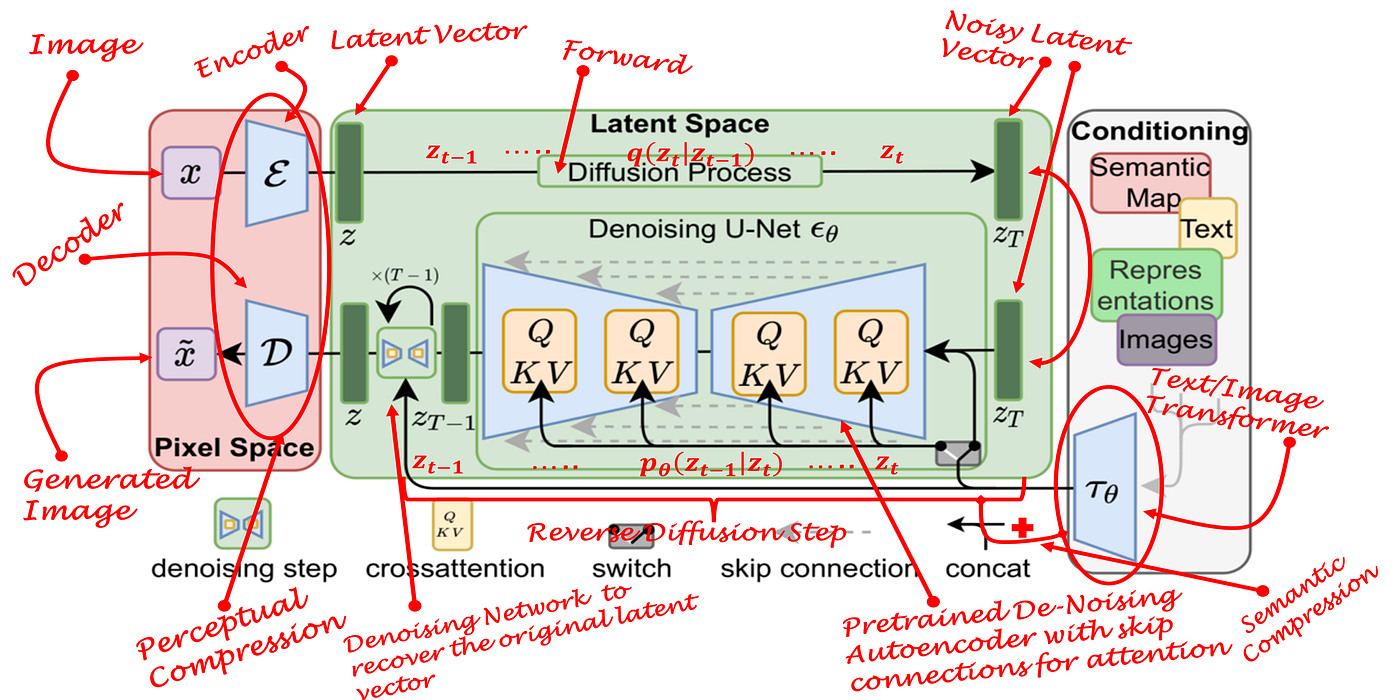

In [ ]:
from PIL import Image
from IPython.display import display

img=Image.open('Data/Diffusion_model.png')
img=img.convert('RGB')
display(img)

# Denoising Diffusion  Probabilistic Models(DDPM) ?

Denoising Diffusion Probabilistic Models (DDPM) is a type of generative model designed to generate high-quality data, such as images, while simultaneously removing noise from the data. It builds upon the principles of diffusion models, which simulate the gradual transformation of noisy data into clean, high-quality data. The main objective of DDPM is to denoise data effectively during the generation process.

Here's a breakdown of how Denoising Diffusion Probabilistic Models work:

1. **Diffusion Process**: DDPM, like other diffusion models, simulates a diffusion process that starts with noisy data and progresses through a series of steps, gradually removing noise. At each step, the model aims to approximate the true data distribution more closely.

2. **Noise Annealing**: The noise added during each step is typically annealed, meaning it is gradually reduced in intensity. Initially, high levels of noise are added, and over time, the noise decreases. This process ensures a smooth and controlled transition from noisy data to clean data.

3. **Probabilistic Framework**: DDPM employs a probabilistic framework to model the uncertainty associated with the data and the noise. It assumes that the observed data is generated by sampling from a probability distribution.

4. **Inference Network**: DDPM often includes an inference network (or a reverse network) that estimates the conditional distribution of the clean data given the noisy data at each step. This network plays a crucial role in denoising by providing information on how to reduce noise effectively.

5. **Training**: DDPM is trained using maximum likelihood estimation (MLE). During training, the model adjusts its parameters to maximize the likelihood of the observed data, given the added noise. This process optimizes the model to generate cleaner data from noisy inputs.

6. **Applications**: DDPM has been used for a variety of applications, including image denoising, image super-resolution, and data inpainting. It excels in situations where noise reduction and data completion are essential.

7. **Quality and Realism**: The effectiveness of DDPM is often measured by the quality and realism of the generated data. The model's ability to produce high-quality images or content, as well as its denoising capabilities, is a key factor in evaluating its performance.

Overall, Denoising Diffusion Probabilistic Models provide a powerful framework for generating high-quality data while removing noise, making them valuable in applications where data quality and fidelity are of utmost importance.

# Implementation Of Image Generation

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Generator model
generator = Sequential([
    Dense(128, input_shape=(100,), activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Combined model (GAN)
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])

# Compile GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002))

# Load dataset (MNIST in this case)
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = X_train / 127.5 - 1.0
X_train = np.expand_dims(X_train, axis=-1)

# Training parameters
batch_size = 64
epochs = 10000

# Training loop

# Inside the training loop, when generating images:
for _ in range(X_train.shape[0] // batch_size):
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(generated_images.shape[0], 28, 28)  # Reshape to 28x28
    image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

    # Rest of your training loop...

for e in range(epochs):
    for _ in range(X_train.shape[0] // batch_size):
        noise = np.random.normal(0, 1, size=[batch_size, 100])
        generated_images = generator.predict(noise)
        image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

        X = np.concatenate([image_batch, generated_images])
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 1

        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_dis)

        noise = np.random.normal(0, 1, size=[batch_size, 100])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

    # Print the progress and save generated images
    print(f"Epoch {e}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss[0]}")

    if e % 100 == 0:
        generated_images = generated_images * 0.5 + 0.5  # Rescale from [-1, 1] to [0, 1]
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.show()


# **Thank You!**